In [1]:
import os
import pandas as pd
import numpy as np
import cv2

def CheckDir(dirname):
	if not os.path.exists(dirname):
		os.makedirs(dirname)

DATA_DIR="Data/PP_pins"
IM_SIZE=(299,299)

In [2]:
FEATURE_DIR="Data/features/"
features=np.load(FEATURE_DIR+"Inceptionv3_avg_RGB.npy")
pins=pd.read_pickle("Data/pins_RGB.pkl")
pins.head()

,Path,Images
0,Data/PP_pins/000337a0ee7432d5453c7016a757d410.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Data/PP_pins/00201308aafb382364df742cd2c88367.jpg,"[[[94, 55, 84], [118, 80, 119], [100, 63, 115]..."
2,Data/PP_pins/00264f7f0e84a86fddd2dc390941c044.jpg,"[[[228, 237, 216], [228, 238, 214], [225, 233,..."
3,Data/PP_pins/0027d4a15fbca7694c80a3a96383292c.jpg,"[[[14, 63, 77], [15, 64, 78], [15, 64, 78], [1..."
4,Data/PP_pins/0028f6bcf10b0b32b8e5774fc21cc305.jpg,"[[[187, 188, 182], [188, 191, 184], [187, 189,..."


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans=KMeans(n_clusters=6, init="k-means++", max_iter=300, n_init=10, random_state=1)
labels=kmeans.fit_predict(features)


In [4]:
pins['Cluster']=labels
pins.head()

,Path,Images,Cluster
0,Data/PP_pins/000337a0ee7432d5453c7016a757d410.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,Data/PP_pins/00201308aafb382364df742cd2c88367.jpg,"[[[94, 55, 84], [118, 80, 119], [100, 63, 115]...",1
2,Data/PP_pins/00264f7f0e84a86fddd2dc390941c044.jpg,"[[[228, 237, 216], [228, 238, 214], [225, 233,...",0
3,Data/PP_pins/0027d4a15fbca7694c80a3a96383292c.jpg,"[[[14, 63, 77], [15, 64, 78], [15, 64, 78], [1...",4
4,Data/PP_pins/0028f6bcf10b0b32b8e5774fc21cc305.jpg,"[[[187, 188, 182], [188, 191, 184], [187, 189,...",4


In [7]:
%matplotlib inline

In [ ]:
from IPython.display import clear_output

x=0
while(input()==""):
	clear_output()
	fig=plt.figure(figsize=(24,48))
	img_index=1
	for i in range(72*x,72*(x+1)):
		fig.add_subplot(12,6,img_index)
		plt.imshow(pins['Images'][i])
		plt.title(pins['Cluster'][i])
		img_index+=1
	plt.show()
	x+=1

#### It got teenager posts separated.... 1 has more text based memes i hope.... will study the rest later

#### Initial expectations are to get a sort of broad classification.... don't know exactly what

In [ ]:
wcss=[]
km=[]
for i in range(2,30):
	kmeans=KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=1)
	kmeans.fit(features)
	km.append(kmeans)
	wcss.append(kmeans.inertia_)

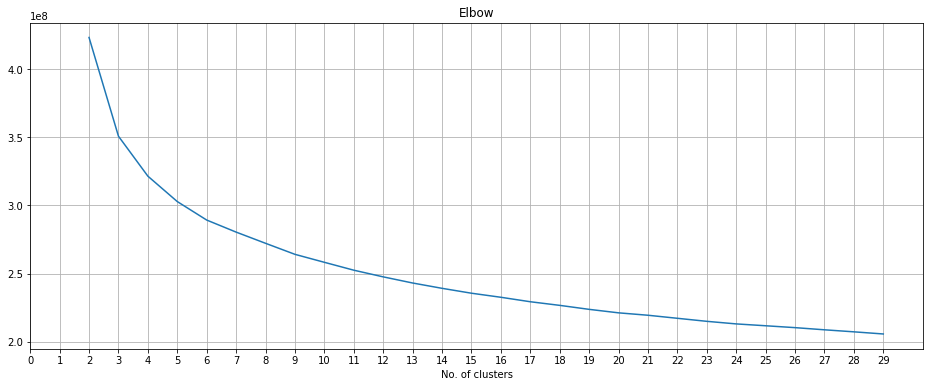

In [20]:
plt.figure(figsize=(16,6))
plt.plot(range(2,30),wcss)
plt.title("Elbow")
plt.xticks(range(30))
plt.xlabel("No. of clusters")
plt.grid()
plt.show()